### Import libaries

In [1]:
import gc
import sys
import os
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/machine_learning/scripts/")

In [3]:
from data_set_up import DataSetUp
from tree_car_price import TreeCarPrice
%load_ext autoreload
%autoreload 2

### Import data and split into train and test 

In [4]:
data = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/processed_data/car_onehot_data.csv")
features,y = data.drop("price",axis=1), data.price

In [5]:
data_setup = DataSetUp(features,y)

In [6]:
X_train,X_test,y_train,y_test = data_setup.data_split(2020,0.1)

### garbage collect

In [7]:
gc.collect()
%reset -f out

Flushing output cache (0 entries)


----
### Decision tree classifer 

* base model 

In [8]:
base_model = DecisionTreeRegressor(random_state=2020)

In [9]:
car_price_decision = TreeCarPrice(base_model,True)

In [10]:
car_price_decision.regression_metrics(X_train,y_train,ind="train")

,r2_score,rmse,price_diff_abs_max
train,0.95629,2067.865839,488.333333


In [11]:
car_price_decision.regression_metrics(X_test,y_test,ind="test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.936699,2426.924577,270.222222


### Much better as compared to a linear regression model with elasticnet regularization. 

### Let's perform gridsearch to see if we can further improve the result

#### Key parameters:
  * max_depth: default None
  * min_samples_split: repeat of max_depth, default 2 
  * min_samples_leaf:default 1 
  * max_features: default None (n_features)

In [12]:
params = {
    "max_features":[0.8,"sqrt","log2","auto",None,0.9]
}

In [13]:
car_price_decision.param_search(params,X_train,y_train,verbose=0)

In [14]:
car_price_decision.search_result.best_params_

{'max_features': 'auto'}

In [15]:
decision_tree_tuned = car_price_decision.search_result.best_estimator_

In [16]:
car_price_decision.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.95629,2067.865839,488.333333


In [17]:
car_price_decision.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.936699,2426.924577,270.222222


### all features, the same as default tree params

### Let's look at feature importance

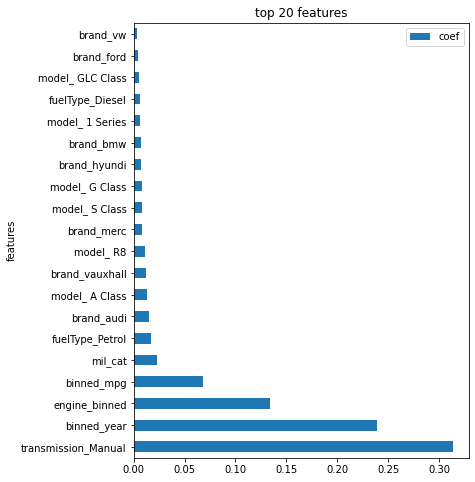

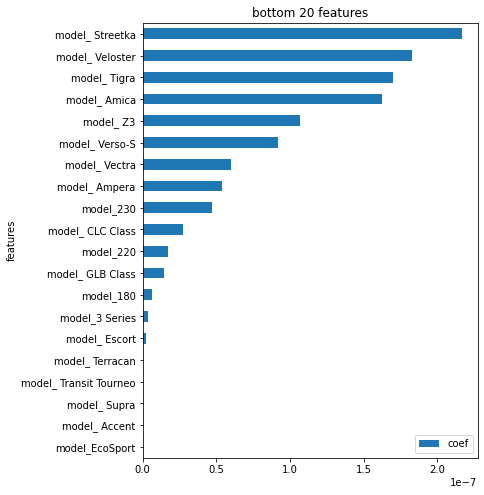

In [18]:
feature_table = car_price_decision.linear_feature_importance(features,plot=True)

### feature importance ranking is quite different from linear regression model.

### Looking at cases big price difference and small price difference

In [19]:
price_table_decision = car_price_decision.price_diff(features,y)

In [20]:
price_table_decision.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
47201,1,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,488.333333,488.333333
44539,1,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,456.481481,456.481481
71617,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,325.516674,325.516674
72016,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,323.613917,323.613917
71817,1,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,270.222222,270.222222
72349,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,263.753724,263.753724
44553,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,250.713649,250.713649
12301,2,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,249.186483,249.186483
78800,2,2,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,244.627917,244.627917
83274,2,3,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,243.883522,243.883522


In [21]:
price_table_decision.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
20085,4,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
64473,3,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
64478,3,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
20061,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20060,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20054,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20051,2,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
86112,3,2,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.0
20047,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
20044,3,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0


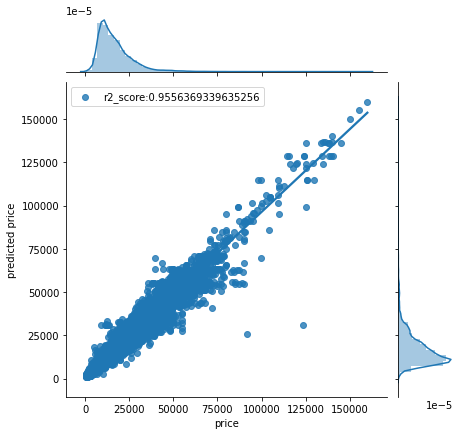

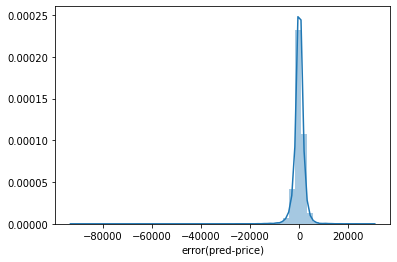

In [22]:
car_price_decision.plot_pred_price(features,y,retrain=True)

### Let's see if an ensemble method would improve the outcome

In [23]:
base_forest = RandomForestRegressor(random_state=2020)

In [24]:
car_price_forest = TreeCarPrice(base_forest,False)

In [25]:
car_price_forest.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.955037,2097.290228,517.68299


In [26]:
car_price_forest.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.940397,2354.971821,245.860431


### Slightly better than decision tree in terms of R2

#### Let's tune with gridsearch

#### Key parameters:

* n_estimators: default 100 
* max_features: default auto (all feautres) sqrt, log2 
* max_samples: if boostrap is true, num of samples draw from X to train , default =None, all samples


In [27]:
params_forest = {
    "n_estimators":[50,100,200,300],
    "max_samples":[None,0.8,0.9]   
}

In [28]:
car_price_forest.param_search(params_forest, X_train, y_train, verbose=0)

In [29]:
forest_tuned_model = car_price_forest.search_result.best_estimator_

In [30]:
car_price_forest.search_result.best_params_

{'max_samples': None, 'n_estimators': 100}

In [31]:
car_price_forest.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.955037,2097.290228,517.68299


In [32]:
car_price_forest.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.940397,2354.971821,245.860431


### Train on entire feature set and save model for car price application 

In [33]:
car_price_forest.regression_metrics(features,y,"entire_data",retrain=True)

,r2_score,rmse,price_diff_abs_max
entire_data,0.954475,2105.210357,496.125816


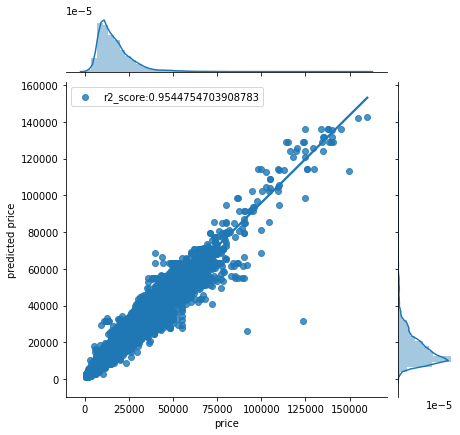

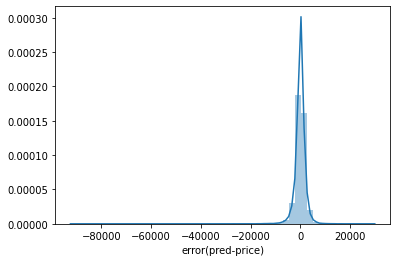

In [34]:
car_price_forest.plot_pred_price(features,y,retrain=False)

In [35]:
car_price_forest.save_model(f"{home}/Documents/projects/Car-Price-Model-Application/"
                            "saved_models/rf_price_regressor.sav")

<!-- ### plot trees -->

### same as default model 

### Let's look at feature importances

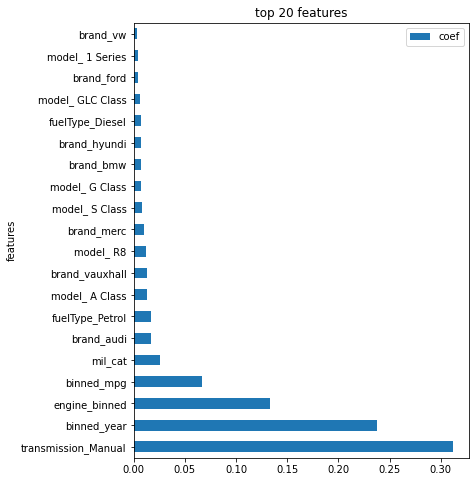

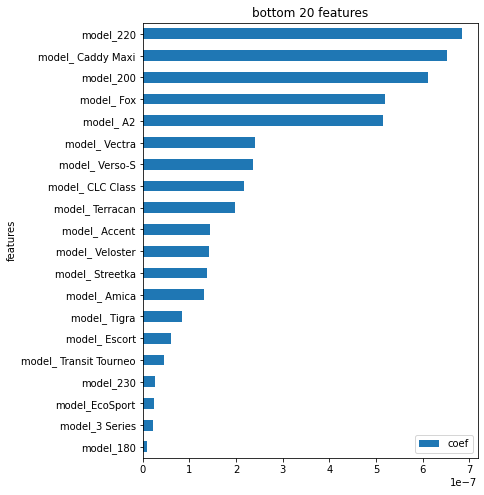

In [36]:
feature_table = car_price_forest.linear_feature_importance(features)

In [37]:
price_table_forest = car_price_forest.price_diff(features,y)

In [38]:
price_table_forest.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
47201,1,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,496.125816,496.125816
44539,1,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,470.197682,470.197682
71617,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,323.412317,323.412317
72016,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,302.519703,302.519703
69135,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,268.677531,268.677531
39711,1,2,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,266.923435,266.923435
44553,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,260.001770,260.001770
72349,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,257.269049,257.269049
83274,2,3,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,243.811456,243.811456
78800,2,2,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,241.605011,241.605011


In [39]:
price_table_forest.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
51217,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
50989,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
50987,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
51093,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
51065,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
51132,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
51236,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
50979,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
50940,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027
50943,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000027,0.000027


#### Tend to over predict price on old car with high milage. 

### Top features are similar among tree and random forest. Bottom features are relatively similar as well

### Let's look at how xgboost work:

In [41]:
xg_model = XGBRegressor(objective="reg:squarederror",seed=2020)
car_price_xg = TreeCarPrice(xg_model,False)

In [42]:
car_price_xg.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.938505,2452.750993,1032.272549


In [43]:
car_price_xg.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.930928,2535.151312,466.803673


### GridSearchTuning

### Key parameters:
* learning_rate
* n_estimators
* subsample
* colsample_bytree

In [44]:
params = {
    "learning_rate":[0.25,0.5],
    "n_estimators":[150,200,250],
    "subsample":[0.9,0.8,0.7],
    "colsample_bytree":[1.0,0.9]
}

In [45]:
car_price_xg.param_search(params,X_train,y_train, verbose=1)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=22)]: Done 180 out of 180 | elapsed: 18.4min finished


In [46]:
car_price_xg_tuned = car_price_xg.search_result.best_estimator_
car_price_xg.search_result.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.25,
 'n_estimators': 250,
 'subsample': 0.8}

In [47]:
car_price_xg.regression_metrics(X_train,y_train,"train")

,r2_score,rmse,price_diff_abs_max
train,0.946001,2298.398681,600.383244


In [48]:
car_price_xg.regression_metrics(X_test,y_test,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.936105,2438.290975,285.170754


### much beter 

### Look at the features

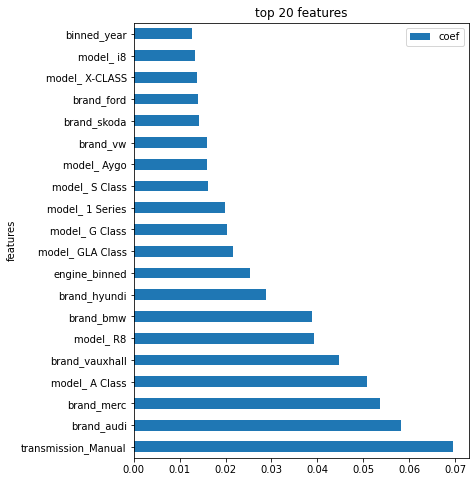

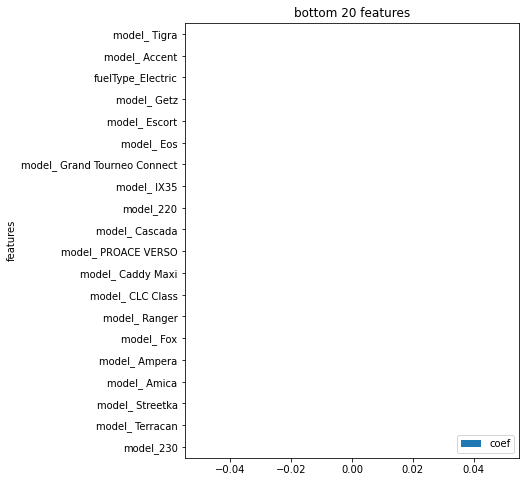

In [49]:
feature_table_xg = car_price_xg.linear_feature_importance(features)

### Let's see if we can remove bottom features to improve the performance

In [50]:
trimmed_features = car_price_xg.remove_features(features,20)
data_setup_trimmed = DataSetUp(trimmed_features,y)
X_train_trimmed,X_test_trimmed,y_train_trimmed,y_test_trimmed = data_setup_trimmed.data_split(1988,0.1)

In [51]:
car_price_xg.regression_metrics(X_train_trimmed,y_train_trimmed,"train")

,r2_score,rmse,price_diff_abs_max
train,0.946457,2277.653265,983.812056


In [52]:
car_price_xg.regression_metrics(X_test_trimmed,y_test_trimmed,"test",retrain=False)

,r2_score,rmse,price_diff_abs_max
test,0.932598,2615.903667,369.338601


### Similar metrics but with less features 
___

### Look at returns with big and small data

In [55]:
price_diff_xg = car_price_xg.price_diff(trimmed_features,y)

In [56]:
price_diff_xg.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
39711,1,2,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,983.812056,983.812056
20061,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,638.647705,638.647705
47201,1,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,412.686849,412.686849
69135,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,397.351635,397.351635
44539,1,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,387.208856,387.208856
72016,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,369.338601,369.338601
71819,1,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,366.219733,366.219733
11984,1,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,364.407642,364.407642
72349,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,285.577339,285.577339
54900,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,281.594428,281.594428


In [57]:
price_diff_xg.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,price_diff_pct,price_diff_abs
61713,3,2,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,-0.002234,0.002234
23174,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.002213,0.002213
26077,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.002213,0.002213
24779,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.002213,0.002213
26348,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.002213,0.002213
24744,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.002213,0.002213
26384,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.002213,0.002213
24760,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.002213,0.002213
75532,3,2,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-0.002205,0.002205
35467,4,0,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.001843,0.001843


### Most of these cars are older cars.
___

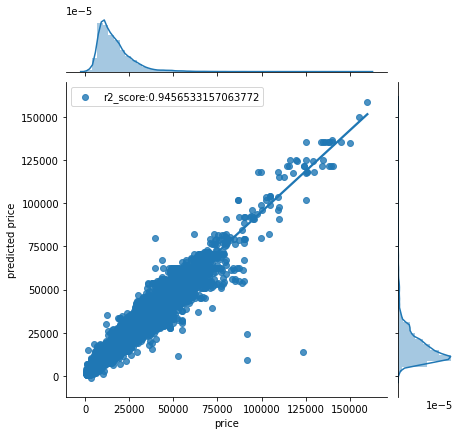

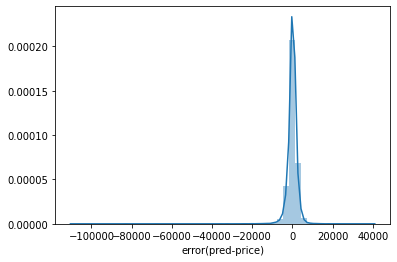

In [58]:
car_price_xg.plot_pred_price(features,y,retrain=True)

### All three tree regressor models tend to have issues with older car especially if the car has lower mileage. 

### Decision tree appears to be a good option for r2 score and smaller faster training model but random forest might be more robust.

### Saving random forest model as one of the ensemble model
___